# App Business Metrics Analysis

In this project, we will explore data from a marketing analytics perspective for the entertainment application Procrastinate Pro+. Despite significant investments in advertising, the company has been incurring losses over the past few months. Our task is to understand the reasons behind this and help the company turn a profit.

**We have data on users acquired from May 1st to October 27th, 2019, including:**

- Server logs with data on their visits.
- Data on their purchases during this period.
- Advertising expenses.

**We will investigate:**

- Where users come from and what devices they use.
- The cost of acquiring users from different advertising channels.
- How much revenue each customer generates.
- When the customer acquisition costs pay off.
- Factors hindering customer acquisition.

**Step 1. Load Data and Prepare for Analysis**

Load data on visits, orders, and advertising expenses from CSV files into variables. The file paths are as follows:

1. /datasets/visits_info_short.csv
2. /datasets/orders_info_short.csv
3. /datasets/costs_info_short.csv

Examine the data and perform preprocessing. Are there any missing values or duplicates in the data? Ensure that data types in all columns match the values stored in them. Pay special attention to columns with dates and times.

**Step 2. Define Functions for Calculating and Analyzing LTV, ROI, Retention, and Conversion**

**These functions will calculate metric values:**

- get_profiles() for creating user profiles.
- get_retention() for calculating Retention Rate.
- get_conversion() for calculating conversion.
- get_ltv() for calculating LTV.

**These functions will create graphs:**

- filter_data() for smoothing data.
- plot_retention() for plotting the Retention Rate graph.
- plot_conversion() for plotting the conversion graph.
- plot_ltv_roi() for visualizing LTV and ROI.

**Step 3. Exploratory Data Analysis**

**Create user profiles. Determine the minimum and maximum user acquisition dates.**
- Find out from which countries users come to the application and which country has the highest percentage of paying users. Create a table showing the number of users and the share of paying users from each country.
- Learn about the devices used by customers and which devices are preferred by paying users. Create a table showing the number of users and the share of paying users for each device.
- Study the advertising sources for user acquisition and identify the channels from which the most paying users come. Create a table showing the number of users and the share of paying users for each acquisition channel.
- After each step, draw conclusions.

**Step 4. Marketing**

- Calculate the total marketing expenses.
- Determine how expenses are distributed among advertising sources, i.e., how much money was spent on each source.
- Create a visualization of the dynamics of expense changes over time (weekly and monthly) for each source. Try to reflect this on one graph.
- Find out the average cost of acquiring one user (CAC) from each source. Use user profiles.
- Write intermediate conclusions.

**Step 5. Assess the Effectiveness of Advertising**

- Using LTV, ROI, and CAC graphs, analyze the effectiveness of advertising. Assume that November 1, 2019, is the date, and the business plan states that users should pay off no later than two weeks after acquisition. Determine the need to include organic users in the analysis independently.
- Analyze the profitability of advertising with LTV, ROI, and CAC graphs, as well as the dynamics of LTV, CAC, and ROI.
- Check user conversion rates and its dynamics. Do the same with user retention. Create and study conversion and retention graphs.
- Analyze the profitability of advertising with a breakdown by devices. Create LTV and ROI graphs, as well as the dynamics of LTV, CAC, and ROI.
- Analyze the profitability of advertising with a breakdown by countries. Create LTV and ROI graphs, as well as the dynamics of LTV, CAC, and ROI.
- Analyze the profitability of advertising with a breakdown by advertising channels. Create LTV and ROI graphs, as well as the dynamics of LTV, CAC, and ROI.

**Answer such questions:**

1. Is advertising aimed at user acquisition paying off overall?
2. What devices, countries, and advertising channels may negatively impact advertising ROI?
3. What could be the causes of profitability issues?

### Load the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    visit = pd.read_csv('C:\\Users\\Домашний\\Desktop\\Яндекс практикум\\Датасеты\\visits_info_short (1).csv')
    order = pd.read_csv('C:\\Users\\Домашний\\Desktop\\Яндекс практикум\\Датасеты\\orders_info_short.csv')
    cost = pd.read_csv('C:\\Users\\Домашний\\Desktop\\Яндекс практикум\\Датасеты\\costs_info_short.csv')
except:
    visit = pd.read_csv('/datasets/visits_info_short.csv')
    order = pd.read_csv('/datasets/orders_info_short.csv')
    cost = pd.read_csv('/datasets/costs_info_short.csv')

In [4]:
# Let's look at the data in the 'visits' table and explore it
visit.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# Check for missing values 
round((visit.isna().mean()*100),2)

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

In [7]:
# now convert column names to lowercase and remove spaces 
visit.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [8]:
visit['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
# Time data transformation
visit['session_start'] = pd.to_datetime(visit['session_start'])#, format="%d-%m-%Y %H:%M")
visit['session_end'] = pd.to_datetime(visit['session_end'])#, format="%d.%m.%Y %H:%M")

In [10]:
# Check for duplicates
print(visit.duplicated().sum())

0


In [11]:
# Let's explore the 'order' table
order.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
# Converting column names to lowercase and removing spaces 
order.columns = ['user_id', 'event_dt', 'revenue']

In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
# Checking for missing values
round((order.isna().mean()*100),2)

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

In [15]:
# Time data transformation
order['event_dt'] = pd.to_datetime(order['event_dt'])

In [16]:
# Checking for duplicates
print(order.duplicated().sum())

0


In [17]:
# Explore the 'cost' table
cost.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [18]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
# Checking for missing values 
round((cost.isna().mean()*100),2)

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

In [20]:
# Сonvert column names to lowercase 
cost.columns = ['dt', 'channel', 'costs']

In [21]:
# Time data transformation
cost['dt'] = pd.to_datetime(cost['dt'])

In [22]:
# Checking for duplicates
print(cost.duplicated().sum())

0


We have analyzed the data and performed preprocessing. There were no missing values or duplicates in the data. The columns with date and time have been converted to the appropriate data type, and now all data types in all columns match their stored values.

### Define functions for calculating and analyzing LTV, ROI, retention, and conversion.

These are the functions for calculating metric values:

- get_profiles() - for creating user profiles,
- get_retention() - for calculating Retention Rate,
- get_conversion() - for calculating conversion,
- get_ltv() - for calculating LTV.

And also functions for plotting graphs:

- filter_data() - for smoothing data,
- plot_retention() - for plotting the Retention Rate graph,
- plot_conversion() - for plotting the conversion graph,
- plot_ltv_roi - for visualizing LTV and ROI.

In [23]:
import time
from datetime import datetime
from datetime import date, timedelta as td

observation_date = datetime(2019, 11, 1).date()  # Analysis phase 
horizon_days = 14  # Analysis horizon 

In [24]:
# Function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Adding the 'payer' column to the provided 'dimensions' list
    dimensions = ['payer'] + dimensions

    # Excluding users who did not 'survive' until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Collecting 'raw' data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [25]:
# Function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Excluding users who did not 'survive' until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Determining the date and time of the first purchase for each user.
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Collecting 'raw' data for retention calculation.
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # Function for grouping the table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Dividing each 'cell' in a row by the cohort size
        # and obtain the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Obtain the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # Obtain the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Returning both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [27]:
def get_ltv(
    profiles,  # Step 1. Obtain user profiles and purchase data
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Exclude users who did not "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Step 2. Add purchase data to profiles

    result_raw = result_raw.merge(
        # Adding purchase timestamps and revenue to profiles
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Step 3. Calculate user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there are no dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):

        # Step 3. Build a revenue table
        # Building a "triangular" table
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # In the cells - revenue for each lifetime
            aggfunc='sum',
        )

        # Step 4. Calculate cumulative revenue
        result = result.fillna(0).cumsum(axis=1)

        # Step 5. Calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Step 6. Merge cohort sizes with the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Step 7. Calculate Customer Lifetime Value (LTV)
        # Divide each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # Exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Restore cohort sizes
        result['cohort_size'] = cohort_sizes
        # Save user data and CAC values in a DataFrame 
        # Adding parameters from dimensions to the DataFrame
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate the average CAC based on dimensions parameters
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI by dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # Add CAC to the ROI table
        roi['cac'] = cac['cac']

        # In the final table, keep cohort sizes and CAC
        # And ROI for lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Returning the LTV and ROI tables
        return result, roi

    # Obtaining the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # For the dynamic tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Obtaining the dynamic tables for LTV and ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # Raw data
        result_grouped,  # LTV table
        result_in_time,  # Dynamic LTV table
        roi_grouped,  # ROI table
        roi_in_time,  # Dynamic ROI table
    )

In [28]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Add the 'payer' column to the dimensions list passed
    dimensions = ['payer'] + dimensions

    # Exclude users who did not 'survive' until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Gather 'raw' data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function for grouping the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Obtain the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Obtain the dynamic retention table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return both tables and raw data
    return result_raw, result_grouped, result_in_time


Мы задали функции LTV, ROI, удержания(retention), конверсии(conversion)

In [29]:
# Function for smoothing the frame

def filter_data(df, window):
    # Apply rolling mean to each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [30]:
# Function for visualizing LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Set the plotting grid
    plt.figure(figsize=(20, 10))

    # Exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # Keep only the desired horizon in the ltv history table
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Separate acquisition cost into a separate frame
    cac_history = roi_history[['cac']]

    # Exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # Keep only the desired horizon in the roi history table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('LTV Dynamics for Users on Day {}'.format(horizon))

    # CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('Acquisition Cost Dynamics')

    # ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.xlabel('Acquisition Date')
    plt.title('ROI Dynamics for Users on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

### Exploratory Data Analysis

- Create user profiles. Determine the minimum and maximum user acquisition dates.
- Identify the countries from which users come to the application and determine the country with the highest number of paying users. Create a table showing the number of users and the proportion of paying users from each country.
- Find out which devices clients use and which devices are preferred by paying users. Create a table showing the number of users and the proportion of paying users for each device.
- Examine the advertising acquisition sources and identify the channels that brought the most paying users. Create a table showing the number of users and the proportion of paying users for each acquisition channel.
- Provide conclusions after each section.

#### Сreate user profiles. Determine the minimum and maximum user acquisition dates.

In [31]:
# Function to create user profiles
def get_profiles(sessions, orders, ad_costs):

    # Find parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # For cohort analysis, determine the date of the first visit
    # and the first day of the month in which the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # Add a feature for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Calculate the number of unique users
    # with the same source and acquisition date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Merge advertising costs and the number of acquired users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Divide advertising expenses by the number of acquired users
    # and save the results in the acquisition_cost (CAC) column
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # Acquisition cost for organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [32]:
# profiles
profiles = get_profiles(visit, order, cost)

In [33]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [34]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [35]:
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [36]:
observation_date

Timestamp('2019-10-27 00:00:00')

- The minimum user acquisition date is May 1, 2019.
- The maximum user acquisition date is October 27, 2019.

#### Find out which countries the users come from and determine which country has the highest number of paying users. We'll create a table that shows the number of users and the proportion of payers from each country.

In [37]:
visit.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


From the obtained table, it's clear that the highest number of paying users is from the USA.

In [38]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = 100*(region_payer_share['payer_users_cnt'] / region_payer_share['users_cnt'])
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


The largest number of users and the highest percentage of paying users are also from the USA, followed by Germany in second place and France in last place.

#### Find out what devices customers use and which devices are preferred by paying users. We'll create a table that shows the number of users and the percentage of paying users for each device.

In [39]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = 100*(device_payer_share['payer_users_cnt'] / device_payer_share['users_cnt'])
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Customers use IPhone, Mac, PC, and Android. The majority of paying users prefer IPhone (6.2%) and Mac (6.4%).

#### Examine the advertising sources of user acquisition and determine the channels from which the most paying users came. We will create a table reflecting the number of users and the share of paying users for each acquisition channel.

In [40]:
profiles['channel'].value_counts()

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

In [41]:
channel_payer_share = pd.DataFrame()
channel_payer_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer_share['share'] = 100*(channel_payer_share['payer_users_cnt'] / channel_payer_share['users_cnt']) 
channel_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


There are a total of 11 user acquisition channels, including organic. The majority of paying users came from the following channels: 
- FaceBoom, 
- TipTop, 
- AdNonSense, 
- lambdaMediaAds.

### Marketing

- Calculate the total marketing expenses.
- Determine how expenses are distributed across advertising sources, i.e., how much money was spent on each source.
- Create a visualization showing the dynamics of expense changes over time (weekly and monthly) for each source. Try to represent this on a single graph.
- Find out the average cost of acquiring one user (CAC) from each source. Use user profiles.

#### Calculate the total marketing expenses, analyze how the spending is distributed across different sources, and visualize the changes over time.

In [42]:
cost.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [43]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = cost.groupby('channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)

channel_costs_report['share'] = 100*(channel_costs_report['costs'] / cost['costs'].sum().round()) 
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.9%
FaceBoom,32445.600000,30.8%
WahooNetBanner,5151.000000,4.9%
AdNonSense,3911.250000,3.7%
OppleCreativeMedia,2151.250000,2.0%
RocketSuperAds,1833.000000,1.7%
LeapBob,1797.600000,1.7%
lambdaMediaAds,1557.600000,1.5%
MediaTornado,954.480000,0.9%


In [44]:
cost['costs'].sum().round()

105497.0

The total marketing expenses amounted to 105,497.

The highest spending was in the TipTop and FaceBoom channels.

**Let's visualize the changes in metrics over time.**

In [45]:
filtered_data = cost.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    ).reset_index()

filtered_data['week'] = filtered_data['dt'].dt.week
filtered_data['month'] = filtered_data['dt'].dt.month

In [46]:
data_agg_by_week = filtered_data.drop(["dt", "month"], axis = 1).groupby("week").agg("sum").reset_index()

In [47]:
data_agg_by_month = filtered_data.drop(["dt", "week"], axis = 1).groupby("month").agg("sum").reset_index()

In [48]:
channels = list(data_agg_by_month.drop(["month"], axis = 1).columns)

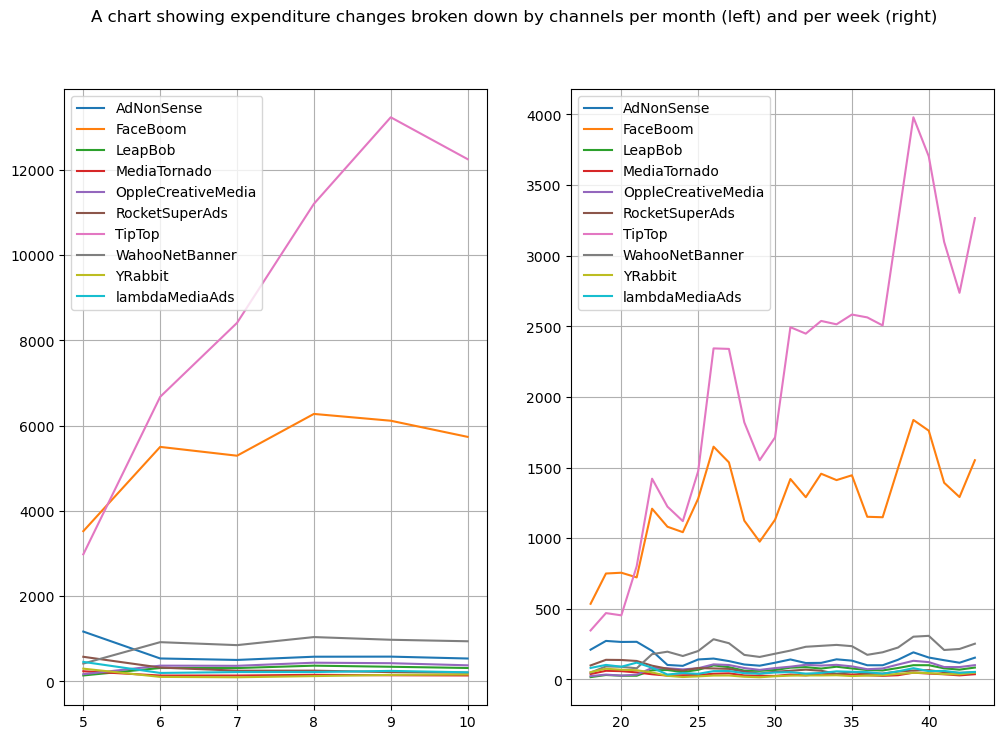

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('A chart showing expenditure changes broken down by channels per month (left) and per week (right)')
_ = ax1.plot(data_agg_by_month["month"], data_agg_by_month.drop(["month"], axis = 1))
ax1.legend(channels, loc='upper left')
ax1.grid()
_ = ax2.plot(data_agg_by_week["week"], data_agg_by_week.drop(["week"], axis = 1))
ax2.legend(channels, loc='upper left')
ax2.grid()
plt.show()

It can be concluded that marketing expenses have increased over time on only two channels: TipTop and FaceBoom.

#### Find out the average cost of acquiring one user from each traffic source. We will calculate the average Customer Acquisition Cost (CAC) per user for the entire project and for each traffic source. We will use user profiles to perform these calculations.

In [50]:
# Calculate CAC for each traffic source
cac_by_channel = pd.DataFrame()

# Exclude organic users:
profiles = profiles.query('channel != "organic"')

# Calculate the mean acquisition cost for each channel
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()

# Sort the data by CAC in descending order
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})


,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [51]:
profiles['acquisition_cost'].mean()

1.127481323942928

In [52]:
CAC_general = profiles.query('channel != "TipTop"')
CAC_general['acquisition_cost'].mean()

0.6856826289048925

The average CAC is approximately 1.13. However, the average CAC without the TipTop channel is 0.69.

The most expensive traffic sources were TipTop (2.8), FaceBoom (1.11), and AdNonSense (1.01).

**Recommendations for the marketing department:**

Reduce expenses on TipTop traffic.
Pay attention to the LeapBob, MediaTornado, YRabbit, and OppleCreativeMedia channels. Acquiring users from these channels is the most cost-effective.

### Assessing Advertising Profitability

Using LTV, ROI, and CAC graphs, analyze the profitability of advertising. Consider that the date is November 1, 2019, and the business plan assumes that users should pay off no later than two weeks after acquisition. Determine the need to include organic users in the analysis.

- Analyze the profitability of advertising using LTV and ROI graphs, as well as graphs of LTV, CAC, and ROI dynamics.
- Check user conversion rates and their dynamics. Do the same with user retention. Create and study conversion and retention graphs.
- Analyze the profitability of advertising broken down by devices. Create LTV and ROI graphs, as well as graphs of LTV, CAC, and ROI dynamics.
- Analyze the profitability of advertising broken down by countries. Create LTV and ROI graphs, as well as graphs of LTV, CAC, and ROI dynamics.
- Analyze the profitability of advertising broken down by advertising channels. Create LTV and ROI graphs, as well as graphs of LTV, CAC, and ROI dynamics.

**Answer the following questions:**
- Is advertising aimed at user acquisition profitable overall?
- What devices, countries, and advertising channels may have a negative impact on advertising profitability?
- What could be the causes of profitability issues?

Write a conclusion, describe possible reasons for the identified problems, and provide interim recommendations for the advertising department.

#### Analyze the overall profitability of advertising. We will create LTV and ROI graphs, as well as graphs showing the dynamics of LTV, CAC, and ROI.

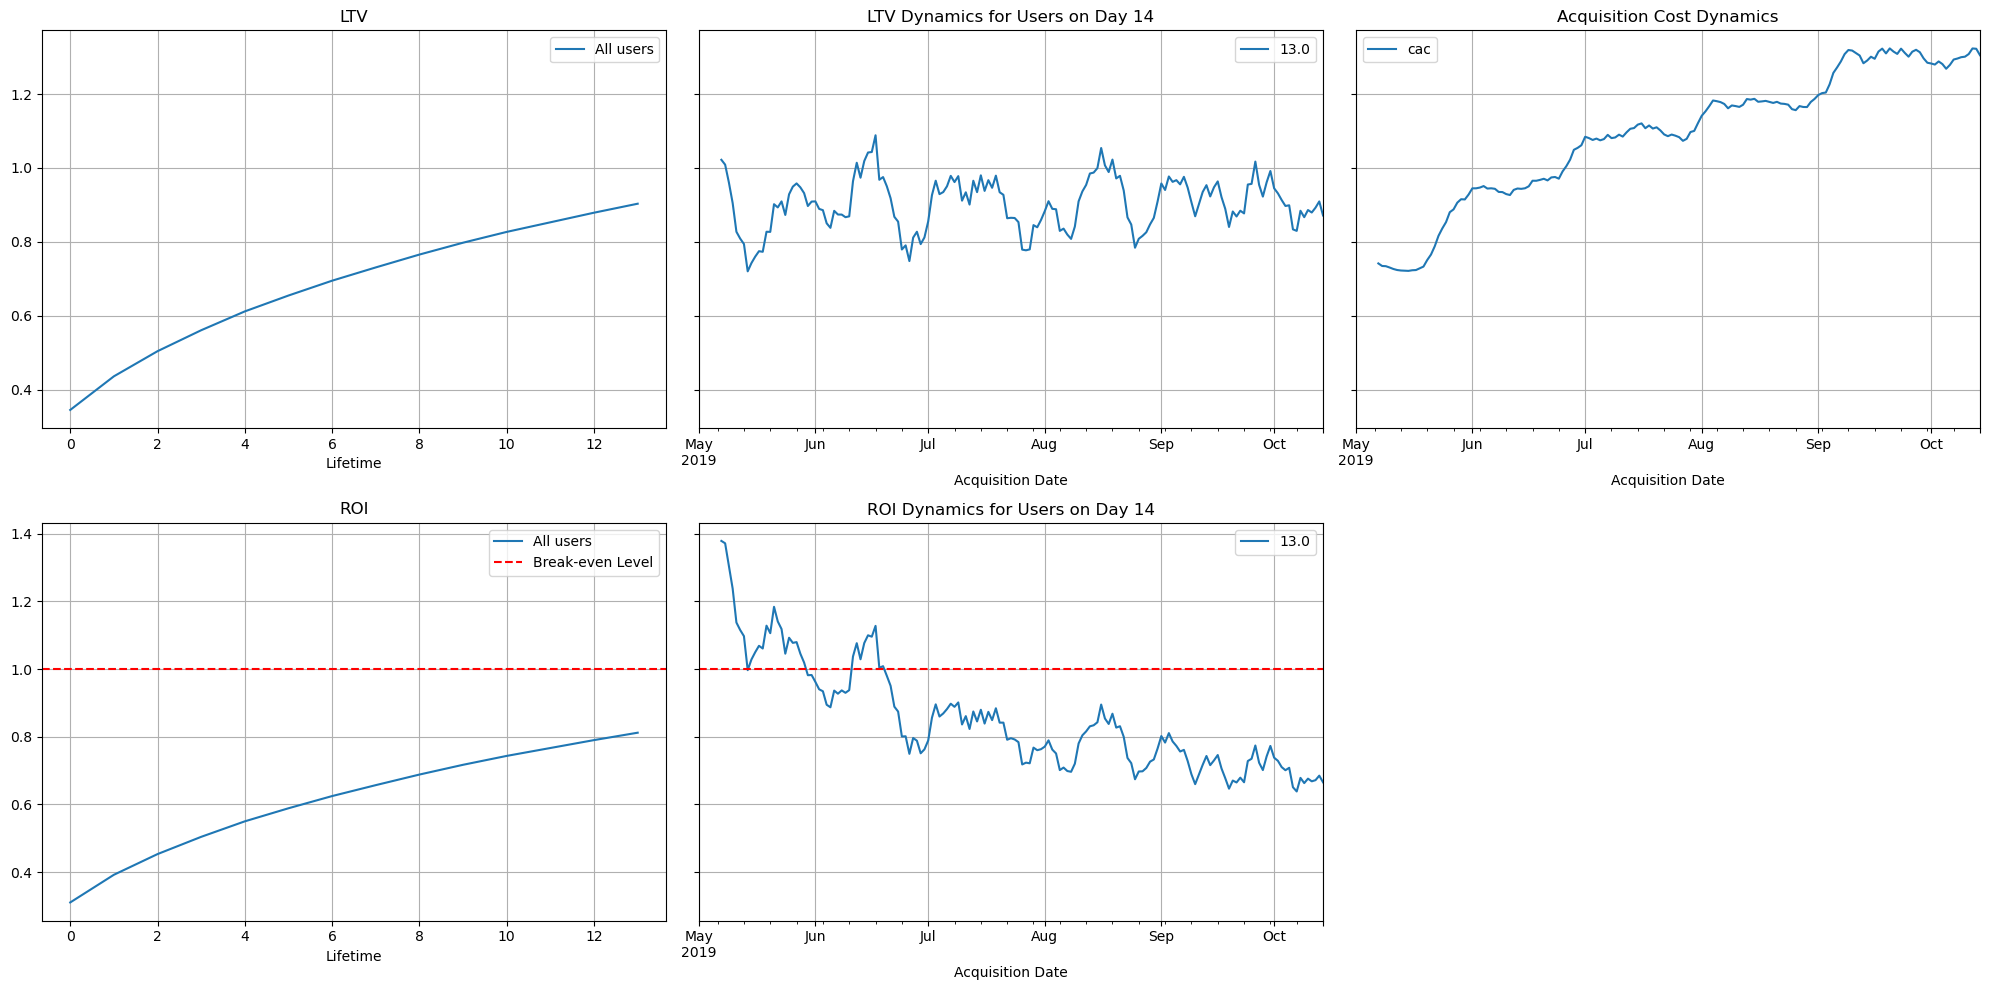

In [53]:
# calculate LTV (Customer Lifetime Value) and ROI (Return on Investment).
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days
)

# create some plots.
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Conclusion based on the overall advertising profitability graphs:

- LTV remains at approximately the same level throughout the entire experiment.
- CAC increases steadily throughout the experiment.
- ROI does not reach the breakeven point.
- Users stop becoming profitable as early as June.

#### Analyze the advertising profitability broken down by countries. We will create LTV and ROI graphs, as well as dynamic graphs for LTV, CAC, and ROI.

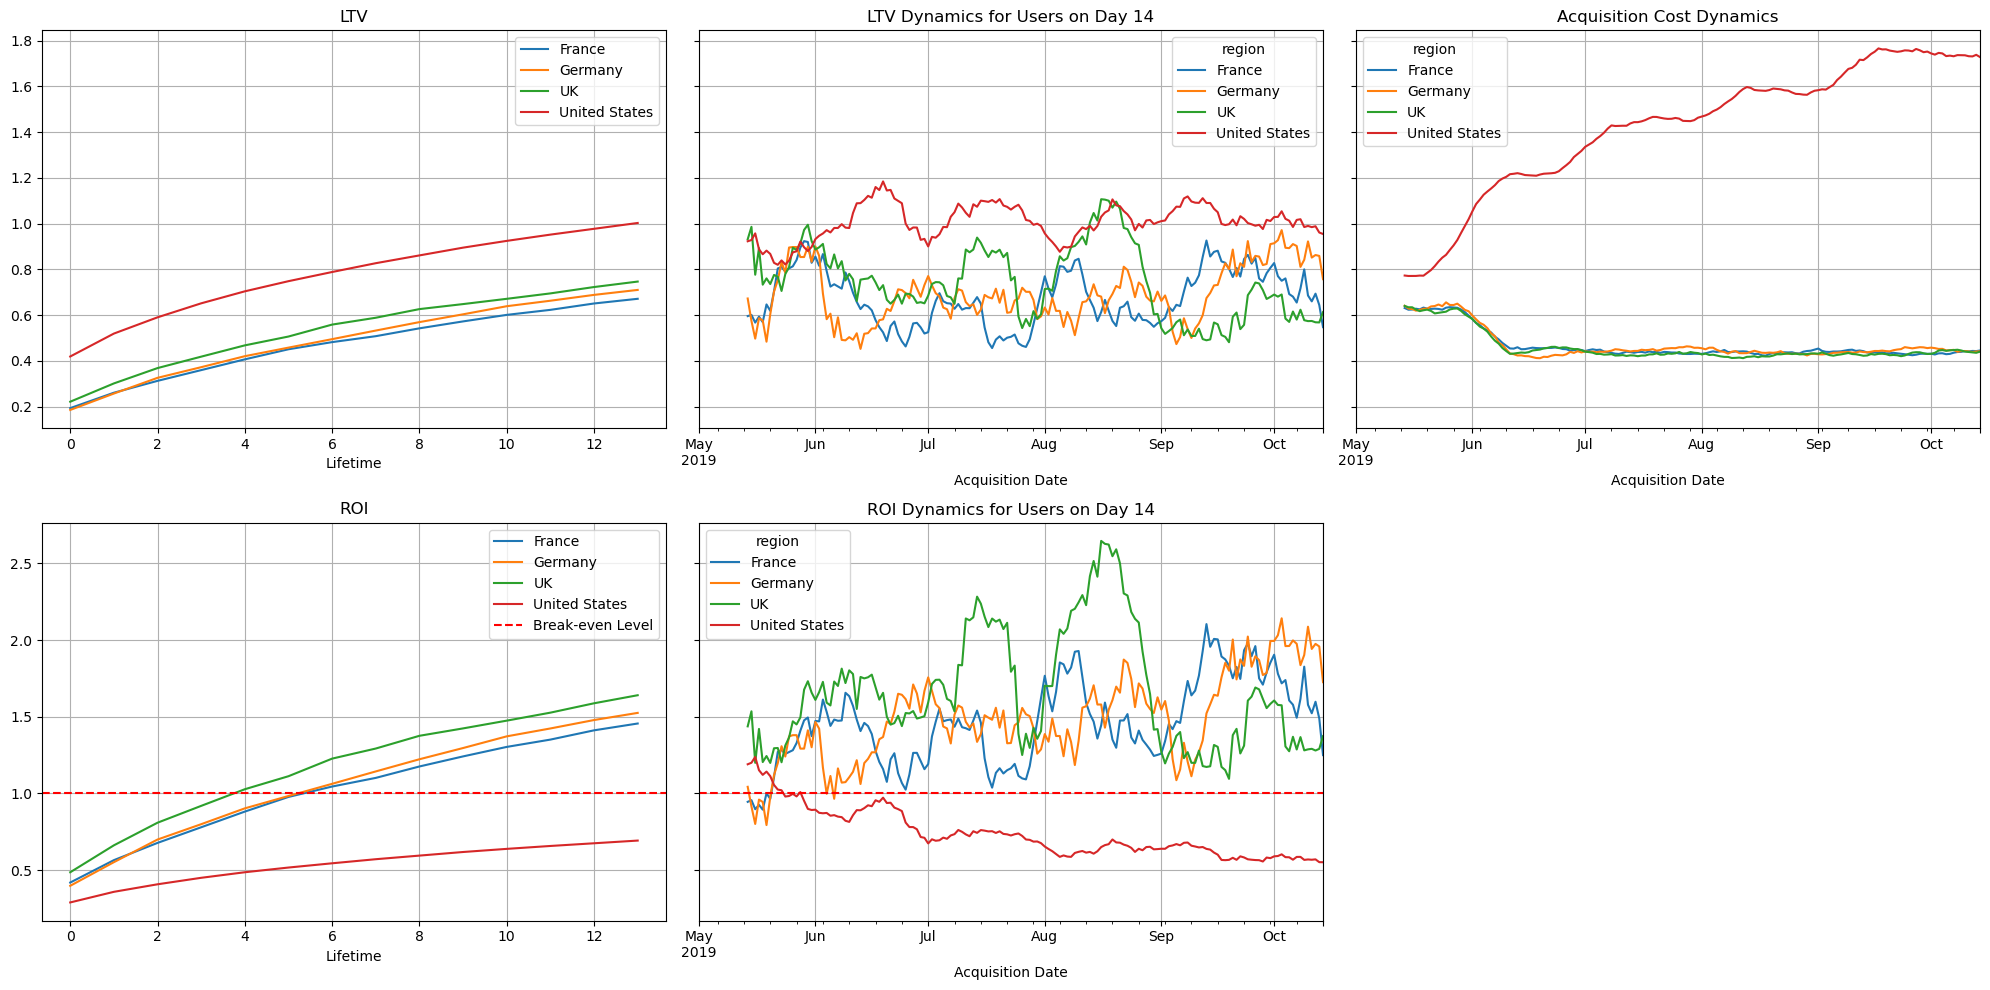

In [54]:
# analyzing the return on investment with a breakdown by countries.

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Conclusion with a breakdown by countries:**

LTV for users from the USA is the highest but also the most costly; however, advertising expenses in the USA are not paying off.

For the other countries, based on the graphs, it appears that advertising is profitable and less expensive.

#### Let's analyze the advertising ROI with a breakdown by advertising channels. We will create LTV and ROI graphs, as well as graphs showing the dynamics of LTV, CAC, and ROI.

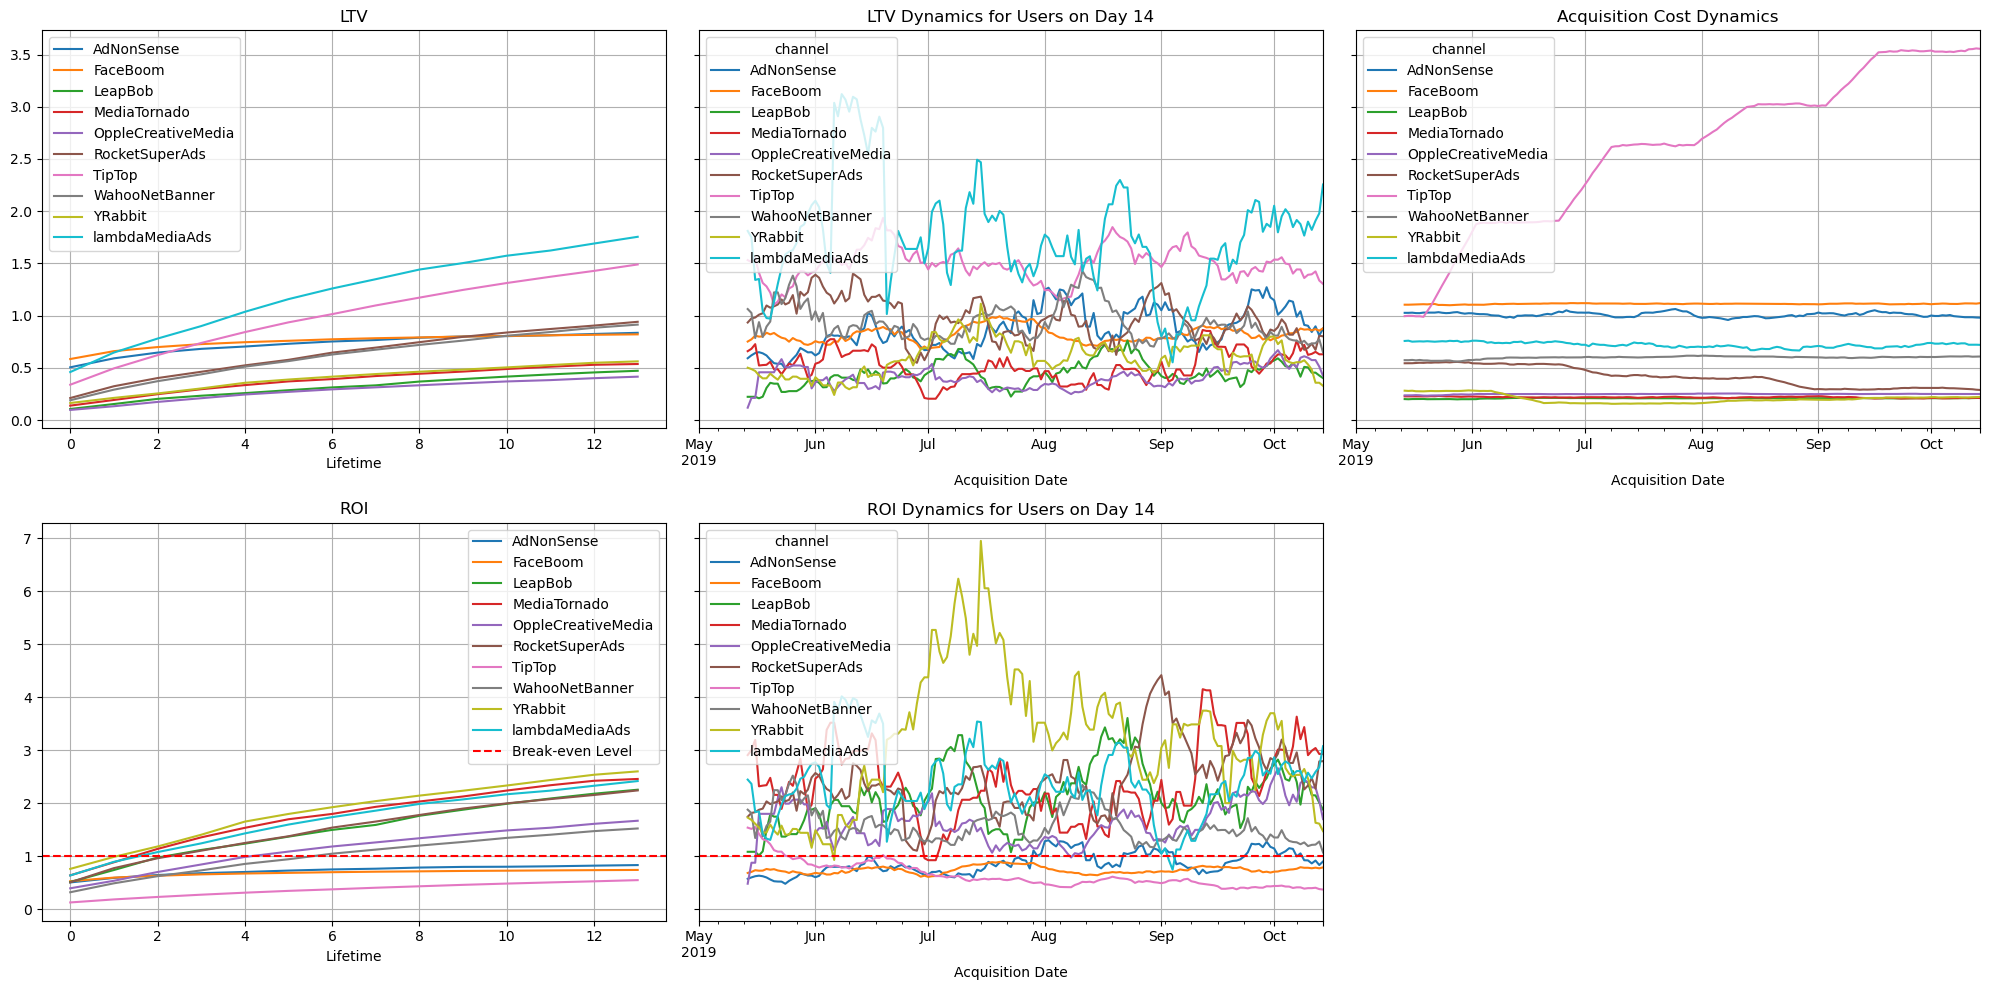

In [55]:
# assessing the return on investment with a breakdown by channels.

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Here is the summary based on the charts with a breakdown by channels:

- The Lifetime Value (LTV) varies significantly across channels.
- The cost per user acquisition is increasing only for the TipTop channel.
- Users from the TipTop, FaceBoom, and AdNonSense channels are not generating enough revenue to cover the costs by the end of the second week.

#### Analyze the profitability of advertising with a breakdown by devices. Create graphs for LTV and ROI, as well as graphs for the dynamics of LTV, CAC, and ROI.

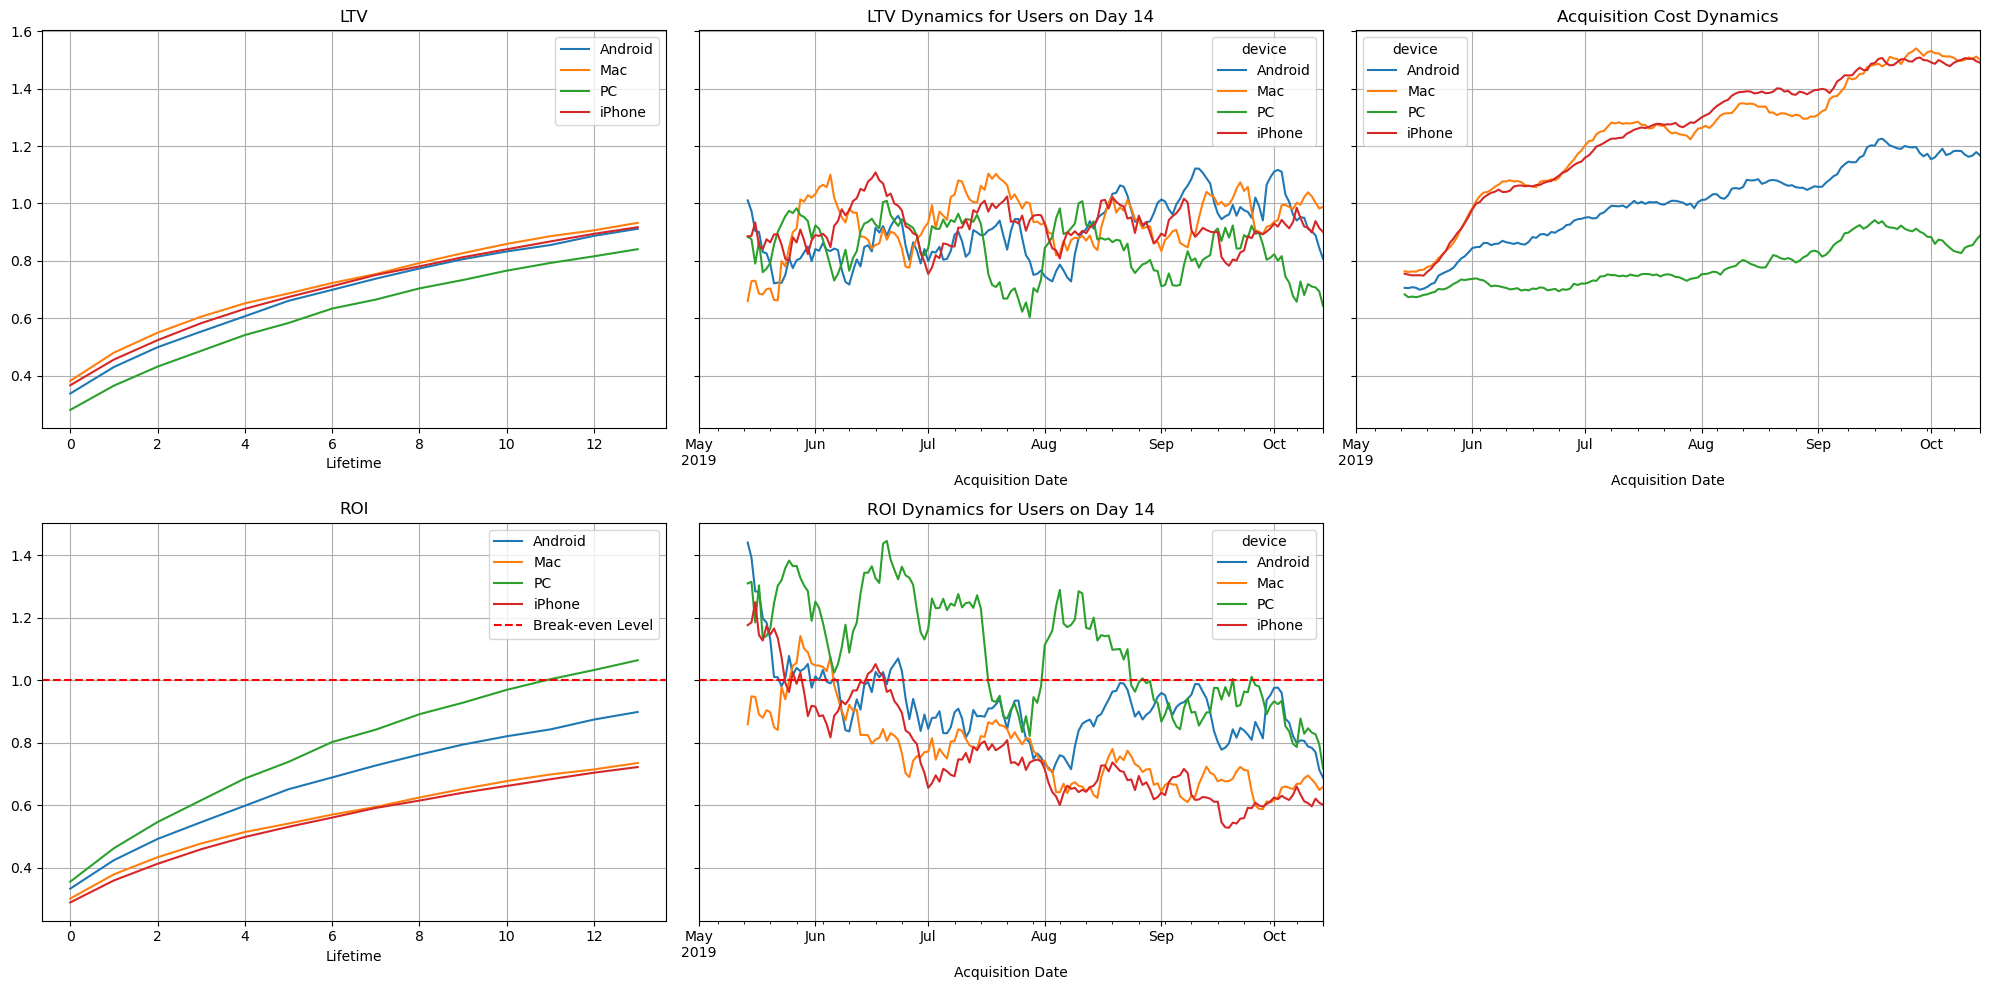

In [56]:
# assessing the profitability with a breakdown by devices.

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


LTV and the user acquisition cost dynamics on PC are lower compared to other devices. It's worth noting that specifically on PC, ROI exceeds the breakeven point, unlike other devices, which can also be observed on the second-week ROI dynamics chart.

#### Сreate and analyze conversion and retention rate graphs with breakdowns by devices, countries, and advertising channels.

In [57]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Set the grid size for the plots
    plt.figure(figsize=(15, 5))

    # Exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # In the conversion history table, keep only the desired lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First plot - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')

    # Second plot - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # The columns of the pivot table will be all index columns except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('User Conversion Dynamics'.format(horizon))

    plt.tight_layout()
    plt.show()

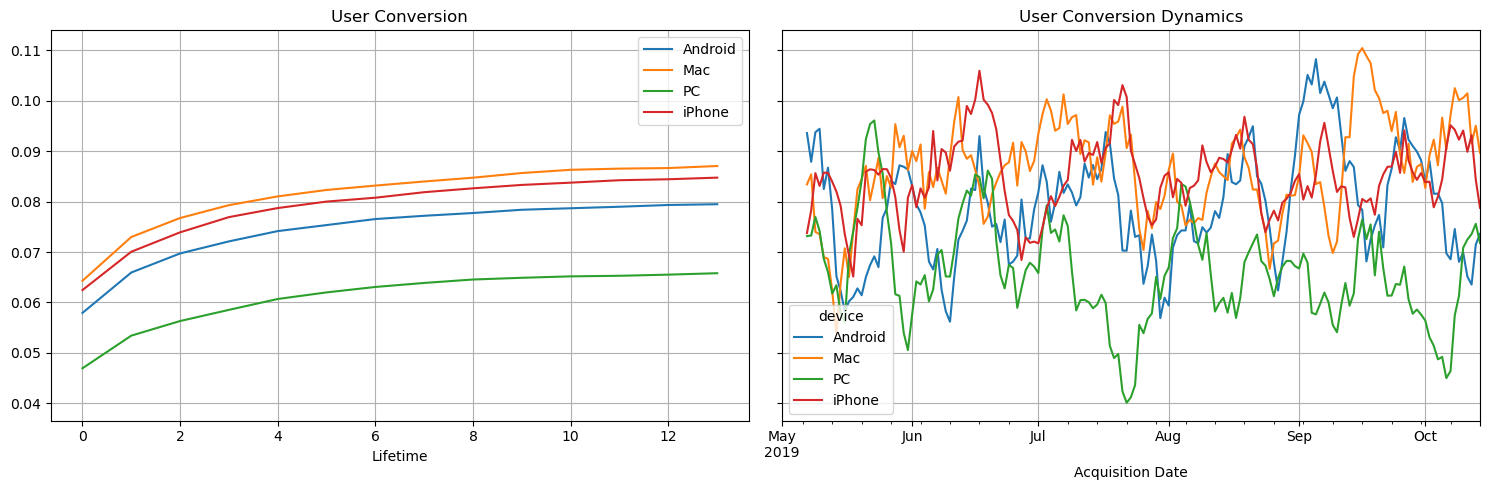

In [58]:
dimensions = ['device']
# looking at conversion rates with a breakdown by devices.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusion:**
Significant drops in conversion rates are observed among PC and Android users.

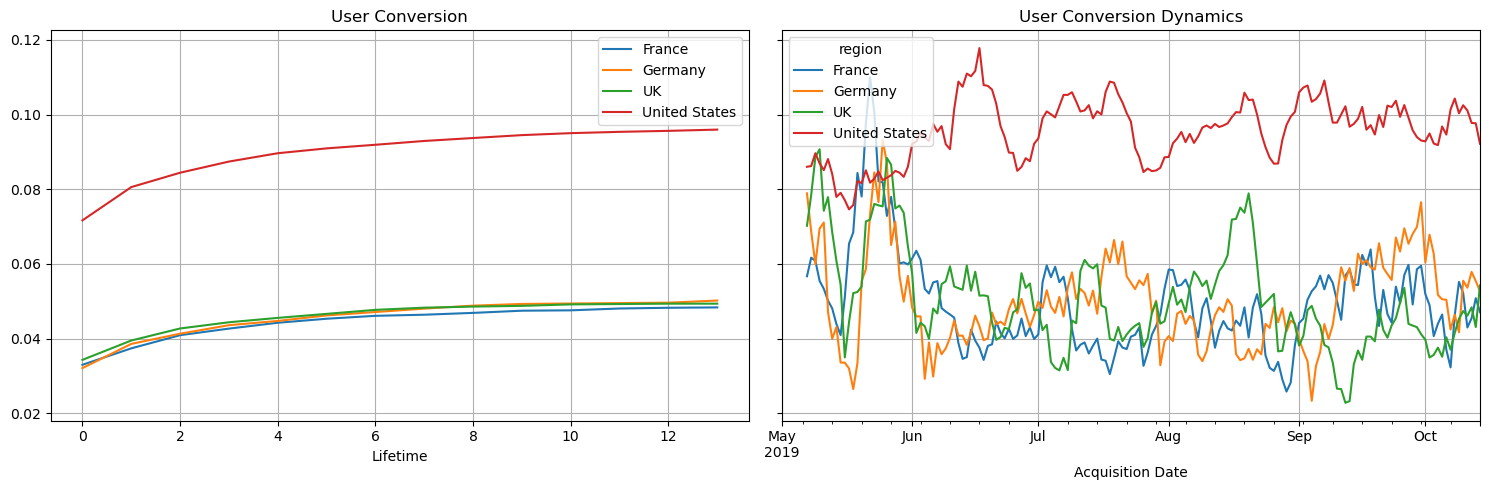

In [59]:
dimensions = ['region']
# examining conversion rates with a breakdown by countries.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusion:**
The conversion rate of users from the USA is twice as high as that of users from other countries.

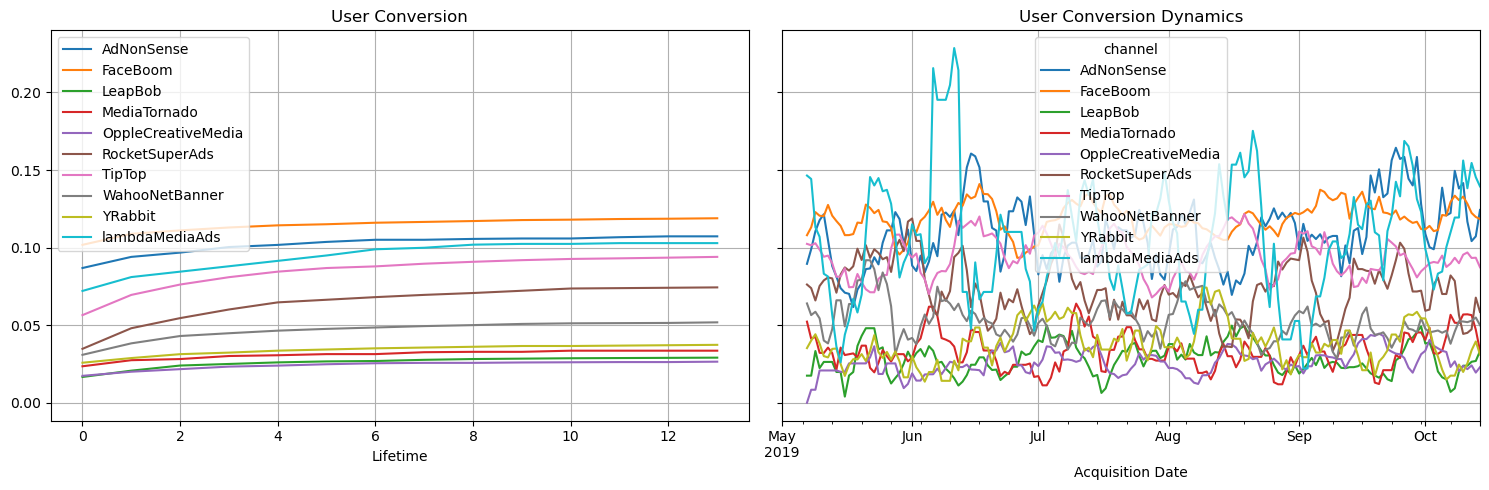

In [60]:
dimensions = ['channel']
# analyzing conversion rates with a breakdown by channels.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusion:**
The highest user conversion rate is associated with the FaceBoom channel; however, there is seasonality in user conversion rates from different channels, which is noticeable on the second graph. This seasonality is particularly pronounced for the lambdaMediaAds channel.

In [61]:
def plot_retention(retention, retention_history, horizon, window=7):

    # Set the grid size for the plots
    plt.figure(figsize=(15, 10))

    # Exclude cohort sizes and Day 0 retention
    retention = retention.drop(columns=['cohort_size', 0])
    # In the retention history table, keep only the desired lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # If there is only one level in the retention index (payer),
    # add a second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # The plot grid has two rows and two columns, a total of four cells
    # In the first cell, plot retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # In the second cell, plot retention curves for non-paying users
    # Vertical axis shares the same scale with the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')

    # In the third cell, plot the dynamics of retaining paying users
    ax3 = plt.subplot(2, 2, 3)
    # Get the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filter the data and plot the graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Dynamics of Retaining Paying Users'.format(
            horizon
        )
    )

    # In the fourth cell, plot the dynamics of retaining non-paying users
    # Vertical axis shares the same scale with the third cell
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filter the data and plot the graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Dynamics of Retaining Non-Paying Users'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

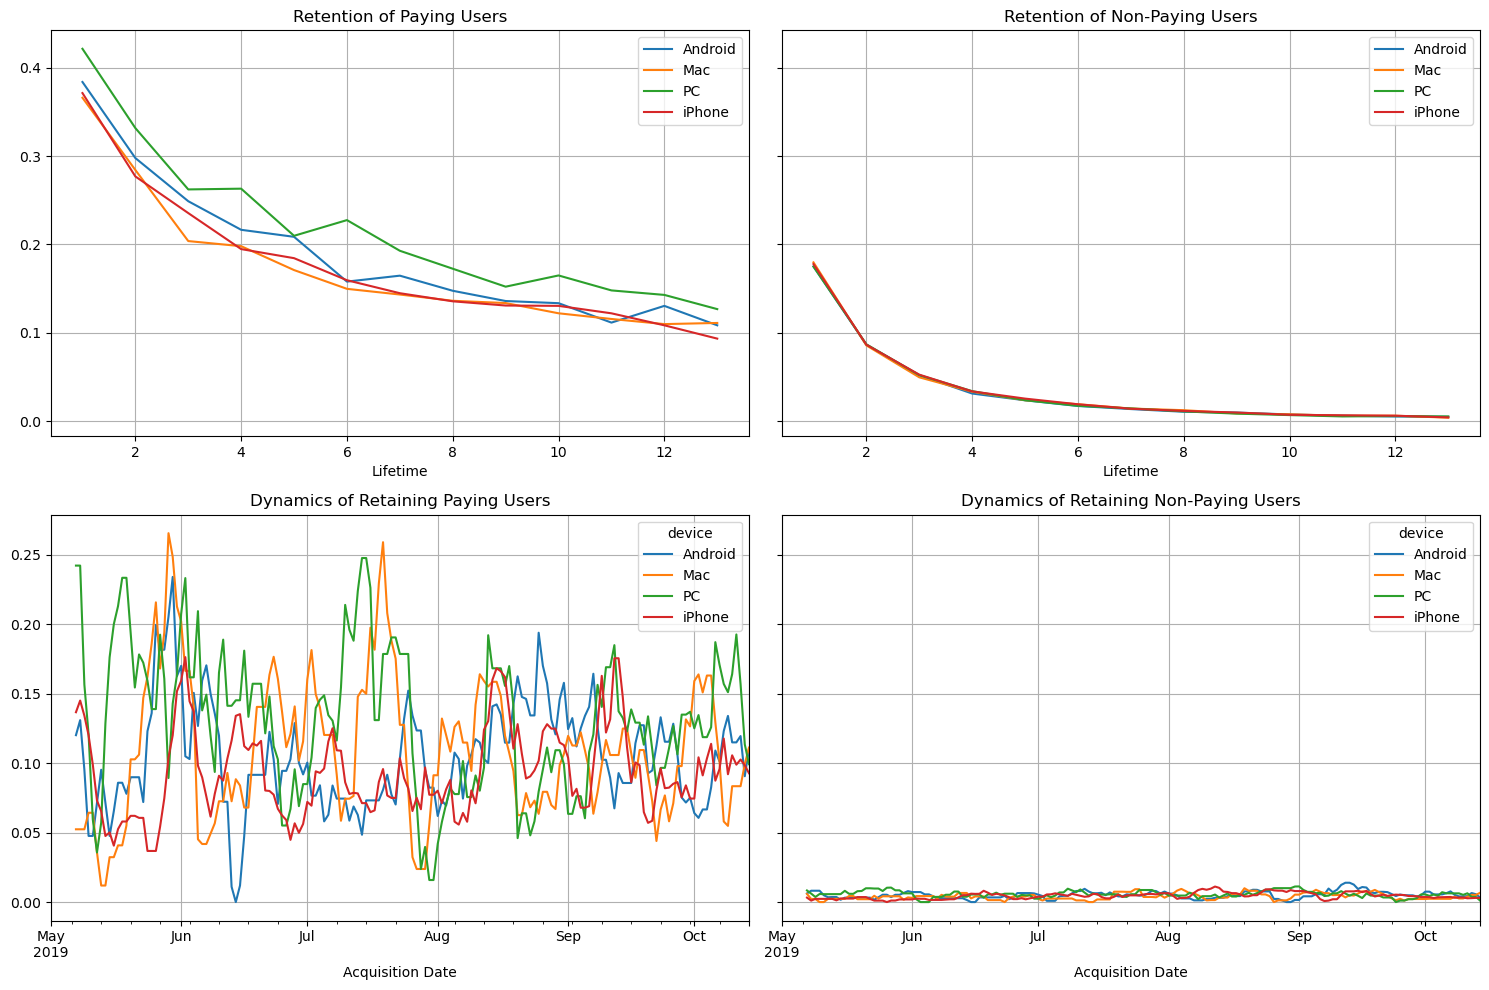

In [62]:
# examining user retention with a breakdown by devices
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Conclusion:**
As can be observed from all the graphs, the retention dynamics of non-paying users are approximately the same. The retention dynamics of paying users on Mac and PC are higher than the others. Paying users on iPhone and Mac devices have the lowest retention rates.

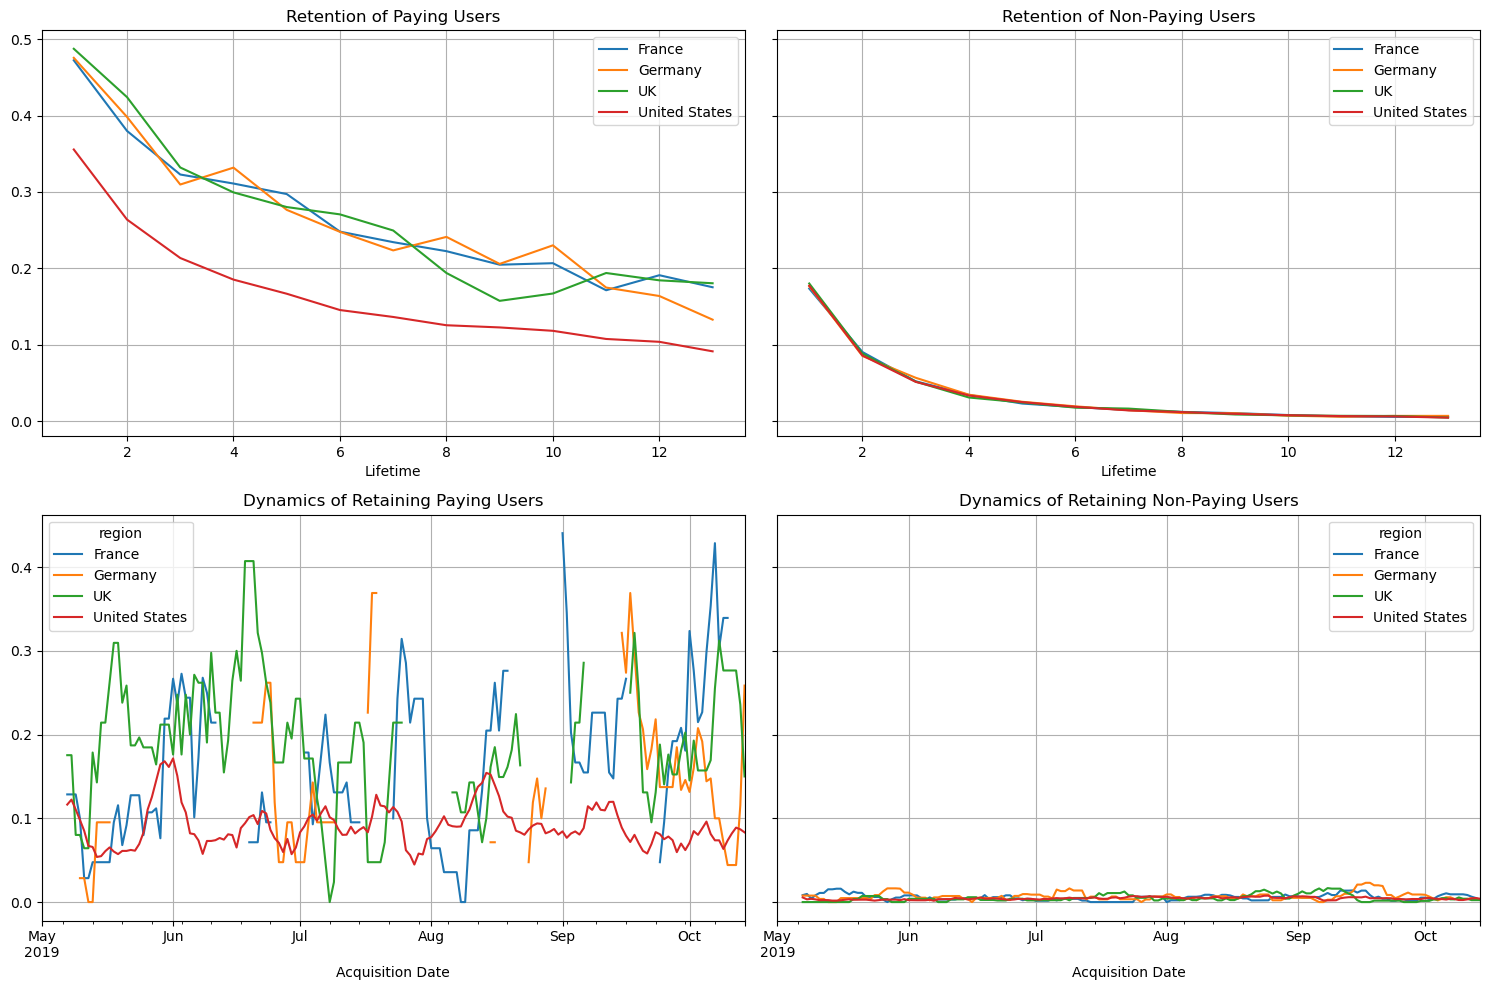

In [63]:
# analyzing user retention with a breakdown by countries
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Conclusion:**
The retention rate of paying users from the USA is the lowest compared to others, while for non-paying users, the situation is nearly the same across all countries.

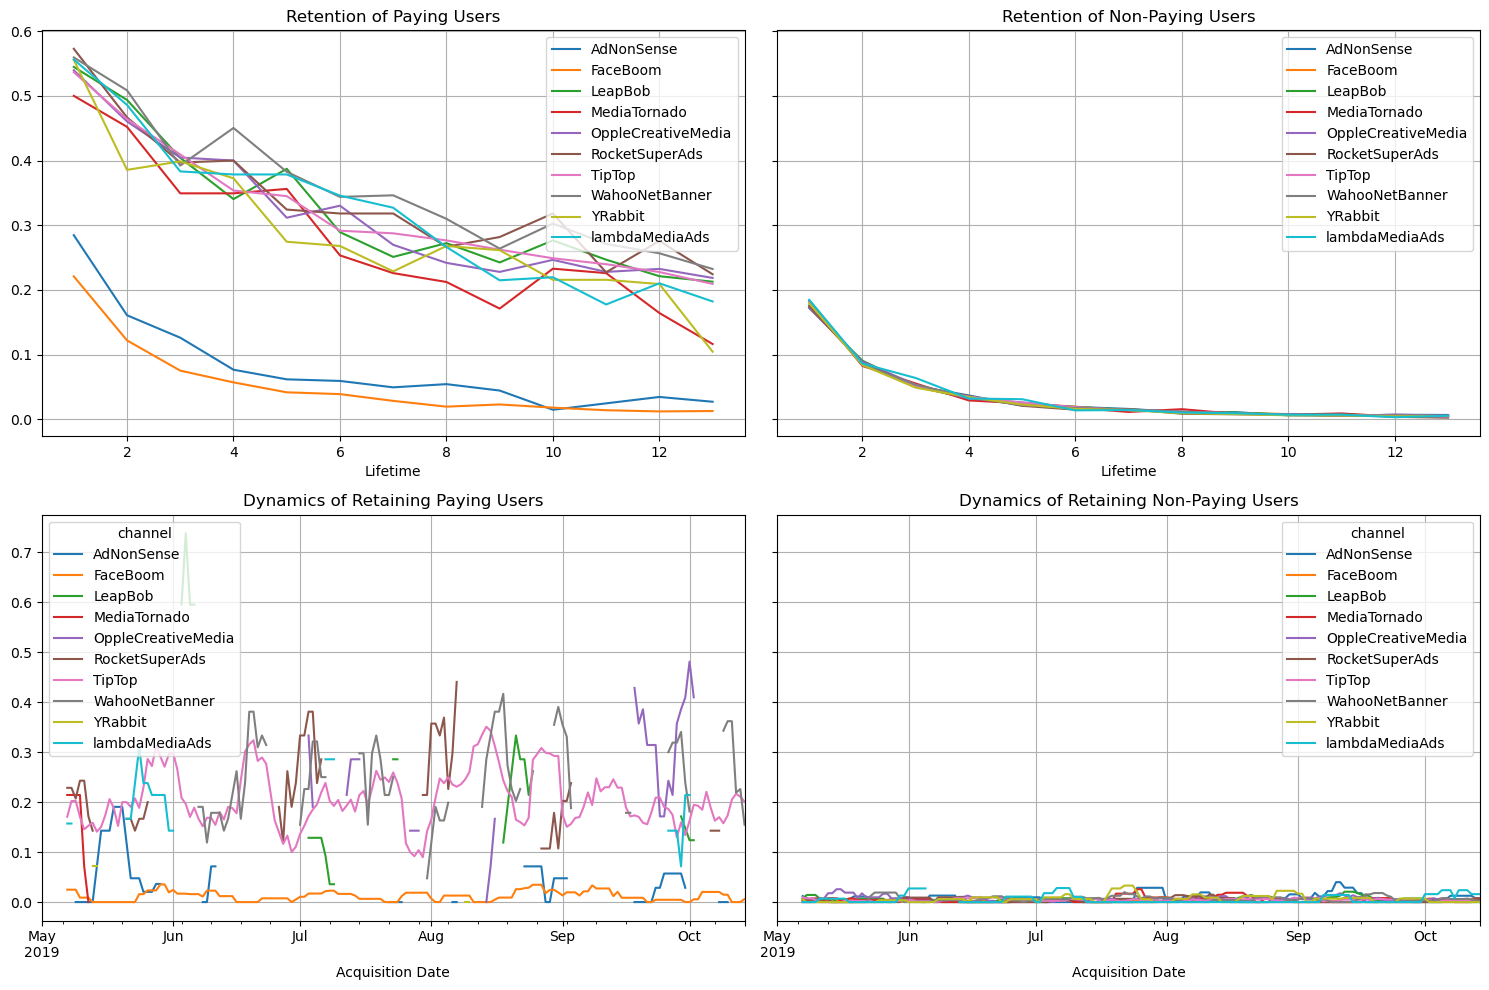

In [64]:
# analyzing user retention with a breakdown by channels
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Conclusion:**
The retention of paying users from the AdNonSense and FaceBoom channels is the lowest compared to other channels. The retention of non-paying users is approximately the same across all channels.

**Answers:**

- Does advertising pay off overall?

In general, it can be said that advertising does not pay off by the end of the second week.

- Which devices, countries, and channels can reduce the profitability of advertising?

Speaking about countries, the USA reduces the profitability of advertising. Regarding channels, TipTop, FaceBoom, and AdNonSense decrease profitability. Paying users on iPhone and Mac devices also have the lowest retention rates. TipTop is the least favorable channel for acquisition, from which most users are from the USA. It is also worth paying attention to the channels from which paying users are acquired.

- What could be causing profitability issues?

Problems with profitability are caused by an incorrect allocation of funds for user acquisition from various channels.

### Conclusions:

Identify the reasons for the ineffectiveness of user acquisition.

Formulate recommendations for the marketing department.

## Conclusions:

- **Identify the reasons for the ineffectiveness of user acquisition.**

    When it comes to the reasons for the ineffectiveness of user acquisition, it is worth paying attention to three investment channels that did not pay off:
    - AdNonSense,
    - FaceBoom,
    - TipTop.

    Users from these channels do not pay off by the end of the second week. It is also important to note that **TipTop and FaceBoom turned out to be the most costly in terms of marketing** (54751.30 and 32445.60).
    Speaking of **AdNonSense**, it is among the top three channels with the highest number of paying users, surpassing even Tip Top. However, in terms of marketing expenses, it lags significantly behind FaceBoom and TipTop. This channel is also in the top three channels with the most expensive traffic but with a much larger gap from the top two leaders. As can be seen from the graphs, **conversion rates for expensive channels are higher, and in the user retention graphs, we can see that AdNonSense and FaceBoom have the lowest retention of paying users, which is the reason for their lack of profitability. As mentioned earlier, profitability issues are caused by an incorrect allocation of funds for user acquisition from various channels.**

    **The main users from these channels are residents of the USA. Also, the retention of paying users from the USA turned out to be the worst**. ROI by countries in dynamics showed that with each month, the acquired paying users from the USA became less profitable, but the cost of acquiring these users continued to rise.

    The study found that **Mac and iPhone users are the least paying**, possibly indicating an issue with optimizing the Procrastinate Pro+ app for iOS devices.

    The advertising system **TipTop was ineffective and the most costly**. It is in the top three channels with the highest traffic costs (TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01)).
    Most likely, the investments are not justifying themselves in this channel. It can be assumed that this network is not popular among residents of the USA. Perhaps it is more commonly used by residents of other countries.

    **FaceBoom had the highest user conversion, but the lowest retention of paying users**. It can be noted that this channel performed well.

**Formulate recommendations for the marketing department.**

- New user acquisition channels should be explored for users from the UK and Germany.
- Focus on attracting more PC and Android users.
- Pay attention to three underrated channels: **lambdaMediaAds, RockerSuperAds, and WahooNetBanner.** These channels have great potential, as seen from the analysis and graphs, where they are profitable, have lower marketing expenses (lambdaMediaAds = 1557, RockerSuperAds = 1833, WahooNetBanner = 5151), and a share of paying users (lambdaMediaAds = 10.5%, RockerSuperAds = 7.9%, WahooNetBanner = 5.3%). Furthermore, lambdaMediaAds ranks 3rd in conversion rates among all channels, RockerSuperAds ranks 5th, and WahooNetBanner ranks 6th among popular expensive but non-profitable channels. As seen in the graphs, all three channels have good user retention compared to other indicators.

- In general, **paying PC users have excellent retention but the lowest conversion rate.** There is potential, but attention should be paid to the advertising itself.

- **The channel with the highest LTV is lambdaMediaAds.** Paying users clearly like the product, and it may be worth finding a cheaper user acquisition channel for them to increase ROI.

- It is also worth working on the content of FaceBoom for better retention of paying users.